# Introduction to Machine Learning: Linear Regression
In this notebook we will look at probably the most popular regresshion method, namely Linear Regression.

In [90]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.patches as mpatches

# Linear Functions
Implement and plot the following functions on the same plot in the range [0,10].

- A linear function with slope 1 and intercept 3
- A linear function with slope 3 and intercept 5
- A linear function with slope 0.5 and intercept -4
- A linear function with slope -1 and intercept 10

Add title, axis labels and legends, to make sure that everyone can understand it.

In [91]:
def linear_function(x, a , b):
    return a * x + b

Text(0, 0.5, 'Y')

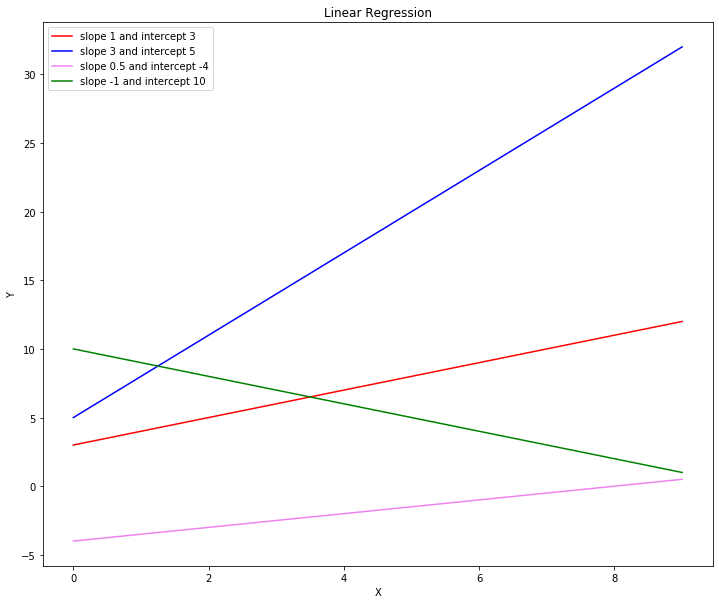

In [104]:
x = np.arange(0,10)

f1 = linear_function(x, 1, 3)
f2 = linear_function(x, 3, 5)
f3 = linear_function(x, 0.5, -4)
f4 = linear_function(x, -1, 10)
# Create plot below

plt.figure(figsize=(12, 10))
plt.plot(x, f1, color = 'red', label='slope 1 and intercept 3')
plt.plot(x, f2, color = 'blue', label='slope 3 and intercept 5')
plt.plot(x, f3, color = 'violet', label='slope 0.5 and intercept -4')
plt.plot(x, f4, color = 'green', label='slope -1 and intercept 10')
plt.title('Linear Regression')
plt.legend(loc="upper left")
plt.xlabel('X')
plt.ylabel('Y')

# Data
We are going to use the Boston dataset, which holds data about the prices of houses in Boston in a particular period as well as some important information about each house that was sold. Load the dataset using the load_boston() method and print the DESCR attribute to learn more about the dataset and what each column represents.

In [22]:
data = load_boston()
description = data.DESCR
print(description)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now lets load the data as X and y. You can do this by taking the data and target attributes of the boston_data object.

In [14]:
X = data.data
y = data.target

As always print the first 5 elements of both X and y to get a feeling of what they look like

In [19]:
print(X[0:5])
print(y[0:5])

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]
[24.  21.6 34.7 33.4 36.2]


Now let's try look at the corelation coefficients between each variable and the target. This will help us identify which feature is going to best predict the price of a house. We can use the corrcoef() method from NumPy, but as it calculates the whole covariance matrix, we need to get the element from the top right corner in order to get the covariance. I will do it for the first column, you task is to use the same method, apply it to all features and print a summary in a readble way ({Feature Name}: {Corr coef with target}). Hint: Column names are stored somewhere in the boston_data object.

In [37]:
names = data.feature_names

for i in range(0, len(names)):
    col_name = names[i]
    corrcoef = abs(np.corrcoef(X[:,i], y)[0,1]) 
    print(f'{col_name} : {corrcoef}')

CRIM : 0.3883046085868114
ZN : 0.3604453424505433
INDUS : 0.4837251600283728
CHAS : 0.17526017719029818
NOX : 0.4273207723732824
RM : 0.695359947071539
AGE : 0.37695456500459606
DIS : 0.24992873408590388
RAD : 0.38162623063977746
TAX : 0.46853593356776696
PTRATIO : 0.5077866855375615
B : 0.33346081965706637
LSTAT : 0.7376627261740148


Based on the output from the previous cell which feature would you choose to predict the house prices if you had to use simple linear regression?

Ansewer: 'LSTAT', because it has the highest correlation coefficient

Now scatter plot the target against the feature you chose in the previous step. Based on the plot, do you think that we will achieve a good result if we fit a simple linear regression based on that feature. Can you make a rough estimate of the slope and intercept?

Answer:

In [106]:
feature_column = X[:, 12]

In [107]:
from scipy.stats import linregress

In [108]:
slope, intercept, r_value, p_value, std_err = linregress(feature_column, y)

Slope:

In [109]:
print(slope)

-0.9500493537579909


Intercept:

In [110]:
print(intercept)

34.55384087938311


In [111]:
f1 = linear_function(feature_column, slope, intercept)

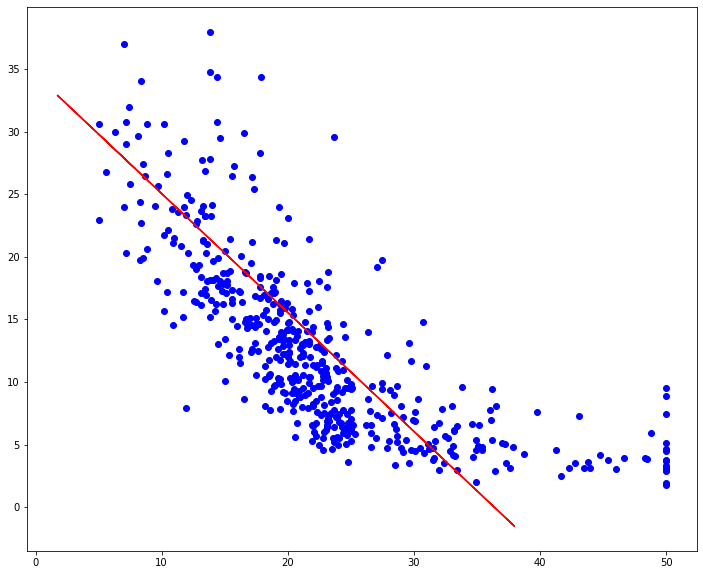

In [112]:
plt.figure(figsize=(12, 10))
plt.scatter(y, feature_column, color='blue')
plt.plot(feature_column, f1, color='red')
plt.show()

# Simple Linear Regression
Now it is time to finaly fit a simple linear regression and explore the results. In the following cell split the data into test and train set, initialise a regressor and fit it with the feature you have chosen above from the training data. Hint: use reshape(-1,1) to create a 2D array from the 1D data

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [119]:
X_train, X_test, y_train, y_test = train_test_split(feature_column, y, test_size=0.2)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

regressor = LinearRegression().fit(X_train, y_train)


Now let's see what the coefficients are from the fitter linear regreesion. Explore the coef_ and intercept_ attributes. Then plot the regression line on top of the plot plot you created above (feature against target). Were you close the actual slope and intercept in your guess?

Answer

In [124]:
coef = regressor.coef_
intercept = regressor.intercept_
print(f'Slope: {coef}')
print(f'Intercept: {intercept}')

Slope: [-0.94231466]
Intercept: 34.46059922373407


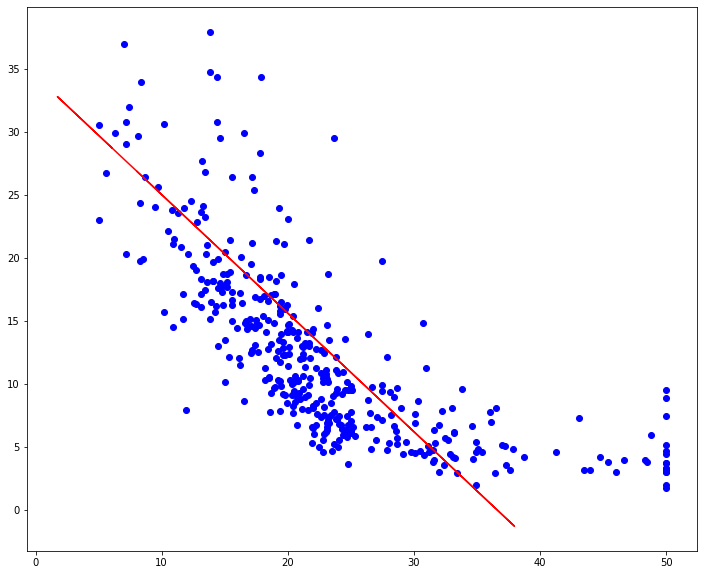

In [123]:
f1 = linear_function(X_train, coef, intercept)

plt.figure(figsize=(12, 10))
plt.scatter(y_train, X_train, color='blue')
plt.plot(X_train, f1, color='red')
plt.show()

Now let's calculate the R^2 score using the test data and the score() method from the linear regression class

In [125]:
from sklearn.metrics import r2_score

In [126]:
y_pred = regressor.predict(X_train)

r2 = r2_score(y_train, y_pred)
print('R^2: ', r2)

R^2:  0.5203781914982455


In my case I have almost doubled the performance, by adding these 2 features. This suggests that adding more features helps, but as you can imagine, the change in performance gets smaller with eery feature added. Now let's train a regressor with all features and report the R^2.

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [128]:
regressor = LinearRegression().fit(X_train, y_train)

In [129]:
y_pred = regressor.predict(X_train)

r2 = r2_score(y_train, y_pred)
print('R^2: ', r2)

R^2:  0.7443337069880469


In [ ]:
What was the effect of the addition of all features?

Answer: The higher the R2 score is, this gives us a more accurate score (our predicted values are closed to the real data)

In [ ]:
Bonus Task
If you find it interesting, find a way to standardise the data and fit a regressor with all features again. Which feature has the highest coefficient?

Answer:

Thank you

In [130]:
from sklearn import preprocessing

In [134]:
y = preprocessing.scale(y)
X = preprocessing.scale(X)

In [135]:
names = data.feature_names

for i in range(0, len(names)):
    col_name = names[i]
    corrcoef = abs(np.corrcoef(X[:,i], y)[0,1]) 
    print(f'{col_name} : {corrcoef}')

CRIM : 0.3883046085868118
ZN : 0.3604453424505426
INDUS : 0.48372516002837257
CHAS : 0.17526017719029874
NOX : 0.42732077237328225
RM : 0.695359947071539
AGE : 0.3769545650045961
DIS : 0.24992873408590388
RAD : 0.3816262306397778
TAX : 0.468535933567767
PTRATIO : 0.5077866855375618
B : 0.3334608196570662
LSTAT : 0.7376627261740147


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [132]:
regressor = LinearRegression().fit(X_train, y_train)

In [133]:
y_pred = regressor.predict(X_train)

r2 = r2_score(y_train, y_pred)
print('R^2: ', r2)

R^2:  0.7434512093455092
